In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt
import pandas as pd
tf.__version__

'2.3.0'

In [3]:
def BlackScholes_Call(T,r,sigma,s,k):
    d1 = (np.log(s/k)+(r+0.5*sigma*sigma)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    c = s*norm.cdf(d1)-k*np.exp(-r*T)*norm.cdf(d2)
    return(c)

In [4]:
def Generate_black_prices(n):

    S = np.linspace(start=50,stop=100,num=50)
    T = np.linspace(start = 0.001,stop = 1,num = 50)
    r = np.linspace(start = 0.001,stop = .2,num = 50)
    sigma = np.linspace(start = 0.001,stop = .4,num = 50)
    k = np.linspace(start=50,stop=100,num=50)

    params =[]
    BS = []
    for i in range(n):
        p = [np.random.choice(T),np.random.choice(r),np.random.choice(sigma),np.random.choice(S),np.random.choice(k)]

        c = BlackScholes_Call(*p)

        params.append(p)

        BS.append(c)
    
    return np.matrix(BS).T, np.matrix(params)

Black, c = Generate_black_prices(10000)

In [9]:
def build_model():
  model = keras.Sequential([
    layers.Dense(300, activation='relu', input_shape=[c.shape[1]]),
    layers.Dense(300, activation='relu'),
    layers.Dense(300, activation='relu'),
    layers.Dense(300, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.Adam()


  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [10]:
EPOCHS = 100
model = build_model()

history = model.fit(c, Black,epochs=EPOCHS)


Epoch 1/100
313/313 [==============================] - 1s 4ms/step - loss: 14.2341 - mae: 2.5324 - mse: 14.2341
Epoch 2/100
313/313 [==============================] - 1s 4ms/step - loss: 6.0532 - mae: 1.8087 - mse: 6.0532
Epoch 3/100
313/313 [==============================] - 1s 4ms/step - loss: 4.4852 - mae: 1.5364 - mse: 4.4852
Epoch 4/100
313/313 [==============================] - 1s 4ms/step - loss: 3.4763 - mae: 1.3238 - mse: 3.4763
Epoch 5/100
313/313 [==============================] - 1s 4ms/step - loss: 2.9814 - mae: 1.2185 - mse: 2.9814
Epoch 6/100
313/313 [==============================] - 1s 4ms/step - loss: 2.7848 - mae: 1.1833 - mse: 2.7848
Epoch 7/100
313/313 [==============================] - 1s 5ms/step - loss: 2.1853 - mae: 1.0351 - mse: 2.1853
Epoch 8/100
313/313 [==============================] - 1s 4ms/step - loss: 2.0329 - mae: 1.0049 - mse: 2.0329
Epoch 9/100
313/313 [==============================] - 1s 4ms/step - loss: 1.7929 - mae: 0.9414 - mse: 1.7929
Epoch 10

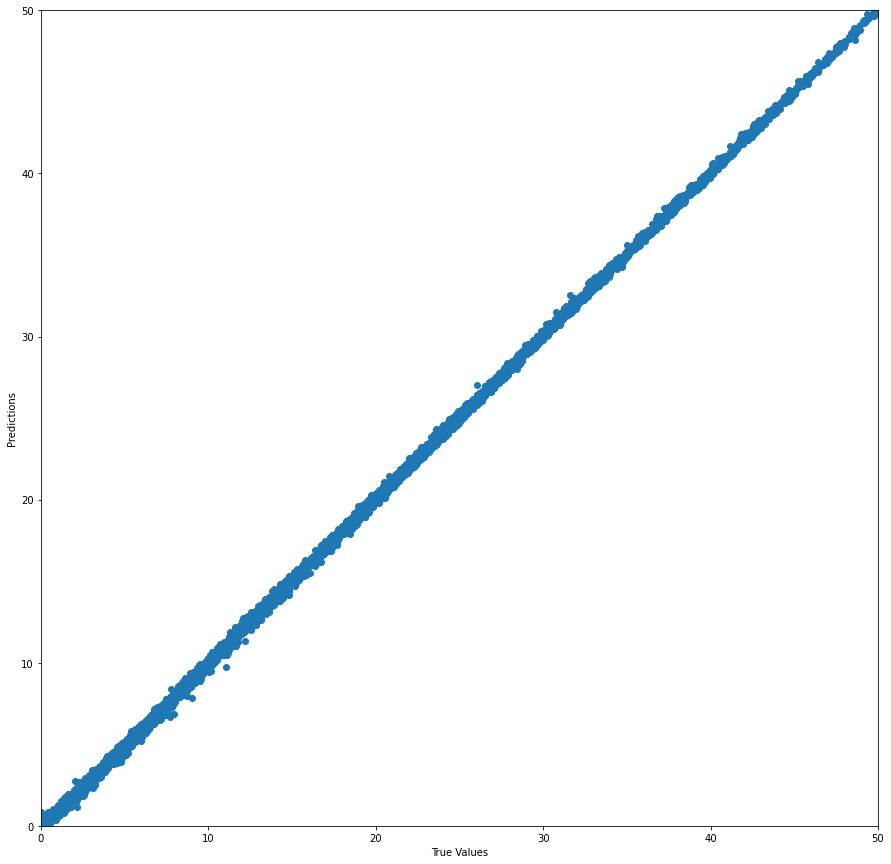

In [12]:
test_predictions = model.predict(c).flatten()

plt.figure(figsize=(15,15))
plt.scatter(np.array(Black.flatten()),test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


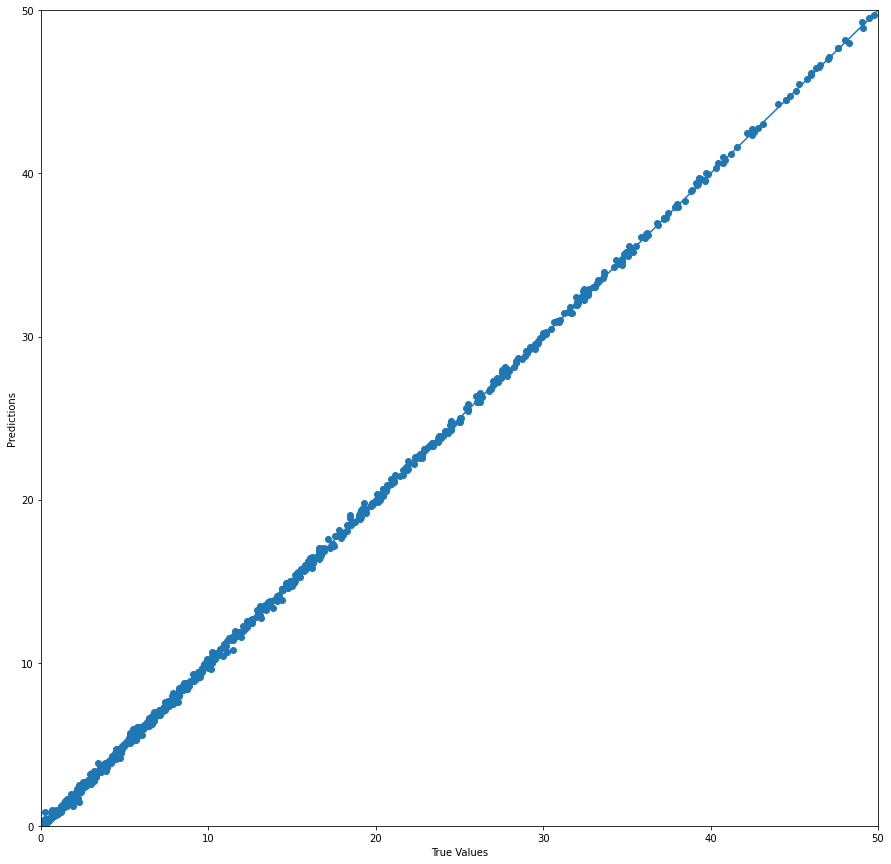

In [13]:

black_test, c_test = Generate_black_prices(1000)

test_predictions = model.predict(c_test).flatten()

plt.figure(figsize=(15,15))
plt.scatter(np.array(black_test.flatten()),test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [15]:
np.mean((np.array(black_test.flatten())-test_predictions)**2)

0.027911220119254718